In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean


In [2]:
data_path='../../Dataset/animal'
categories = os.listdir(data_path)
print(categories)

['dogs', 'cats', 'panda']


In [3]:
train_data = []

for c in categories:
  path = os.path.join(data_path,c)
  label = categories.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      img_arr = cv2.resize(img_arr,(256,256))
      train_data.append([img_arr, label])
    except Exception as e:
      pass

print(len(train_data))

100%|██████████| 100/100 [00:00<00:00, 364.93it/s]

300


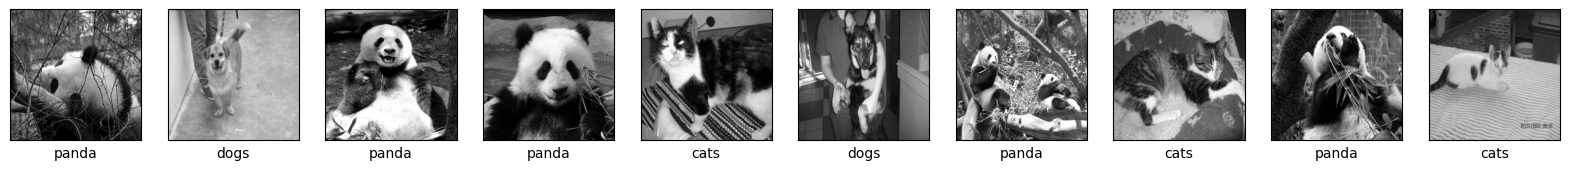

In [4]:
random.shuffle(train_data)

plt.figure(figsize=(20,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_data[i][0],cmap='gray')
    plt.xlabel(categories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [5]:
# Define distance functions
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [6]:
# Define knn function
def knn(train_data, k_values, distance_metric):
    accuracies = []

    for k in k_values:
        folds = np.array_split(train_data, 5)

        fold_accuracies = []

        # Cross-validation
        for i in range(5):
            validation_set = folds[i]

            # Use the remaining folds as the training set
            training_set = np.concatenate([folds[j] for j in range(5) if j != i])

            correct_predictions = 0

            for v in validation_set:
                distances = []
                for t in training_set:
                    if distance_metric == 'manhattan':
                        d = manhattan_distance(t[0], v[0])
                    elif distance_metric == 'euclidean':
                        d = euclidean_distance(t[0], v[0])
                    distances.append([d, t[1]]) 

                distances.sort()

                k_nearest_labels = [distances[j][1] for j in range(k)]  # Extract labels of k nearest neighbors

                # Determine the most common label
                label_counts = Counter(k_nearest_labels)
                most_common_label = max(label_counts, key=label_counts.get)

                if most_common_label == v[1]:  # Compare with true label
                    correct_predictions += 1

            accuracy = correct_predictions / len(validation_set)
            fold_accuracies.append(accuracy)

        accuracies.append((k, fold_accuracies))

    return accuracies



In [7]:
def plot_single_accuracy(accuracies, k_values, title, color, label):
    plt.figure(figsize=(10, 6))

    # Plot individual fold points
    for k, fold_accs in accuracies:
        plt.plot([k]*len(fold_accs), fold_accs, color+'o')

    # Mean & std for error bars
    means = [np.mean(accs) for _, accs in accuracies]
    stds  = [np.std(accs) for _, accs in accuracies]

    plt.errorbar(k_values, means, yerr=stds, fmt=color+'-', capsize=5, label=label)

    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
train_data = np.array(train_data, dtype=object)
k_values = range(1, 21)

# Calculate accuracies using Manhattan distance
manhattan_accuracies = knn(train_data, k_values, 'manhattan')
print("Printing Manhattan 5-fold accuracies:")
for k, fold_accuracies in manhattan_accuracies:
    for accuracy in fold_accuracies:
        print(f'k = {k}, accuracy = {accuracy:.6f}')

Printing Manhattan 5-fold accuracies:
k = 1, accuracy = 0.283333
k = 1, accuracy = 0.350000
k = 1, accuracy = 0.350000
k = 1, accuracy = 0.333333
k = 1, accuracy = 0.266667
k = 2, accuracy = 0.283333
k = 2, accuracy = 0.350000
k = 2, accuracy = 0.350000
k = 2, accuracy = 0.333333
k = 2, accuracy = 0.266667
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.350000
k = 3, accuracy = 0.316667
k = 3, accuracy = 0.316667
k = 3, accuracy = 0.300000
k = 4, accuracy = 0.333333
k = 4, accuracy = 0.383333
k = 4, accuracy = 0.350000
k = 4, accuracy = 0.283333
k = 4, accuracy = 0.283333
k = 5, accuracy = 0.250000
k = 5, accuracy = 0.400000
k = 5, accuracy = 0.350000
k = 5, accuracy = 0.283333
k = 5, accuracy = 0.366667
k = 6, accuracy = 0.316667
k = 6, accuracy = 0.400000
k = 6, accuracy = 0.366667
k = 6, accuracy = 0.300000
k = 6, accuracy = 0.316667
k = 7, accuracy = 0.300000
k = 7, accuracy = 0.383333
k = 7, accuracy = 0.366667
k = 7, accuracy = 0.316667
k = 7, accuracy = 0.283333
k = 8, accuracy =

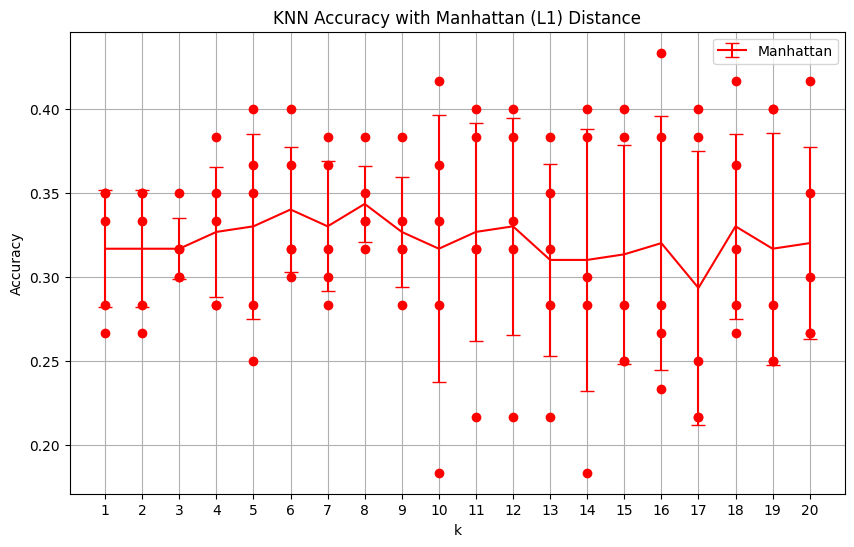

In [9]:
plot_single_accuracy(
    accuracies=manhattan_accuracies,
    k_values=k_values,
    title='KNN Accuracy with Manhattan (L1) Distance',
    color='r',
    label='Manhattan'
)

In [10]:
train_data = np.array(train_data, dtype=object)
k_values = range(1, 21)

euclidean_accuracies = knn(train_data, k_values, 'euclidean')
print("Printing Euclidean 5-fold accuracies")
for k, fold_accuracies in euclidean_accuracies:
    for accuracy in fold_accuracies:
        print(f'k = {k}, accuracy = {accuracy:.6f}')

Printing Euclidean 5-fold accuracies
k = 1, accuracy = 0.383333
k = 1, accuracy = 0.316667
k = 1, accuracy = 0.416667
k = 1, accuracy = 0.333333
k = 1, accuracy = 0.466667
k = 2, accuracy = 0.383333
k = 2, accuracy = 0.316667
k = 2, accuracy = 0.416667
k = 2, accuracy = 0.333333
k = 2, accuracy = 0.466667
k = 3, accuracy = 0.466667
k = 3, accuracy = 0.366667
k = 3, accuracy = 0.416667
k = 3, accuracy = 0.333333
k = 3, accuracy = 0.366667
k = 4, accuracy = 0.383333
k = 4, accuracy = 0.416667
k = 4, accuracy = 0.516667
k = 4, accuracy = 0.300000
k = 4, accuracy = 0.433333
k = 5, accuracy = 0.450000
k = 5, accuracy = 0.383333
k = 5, accuracy = 0.416667
k = 5, accuracy = 0.383333
k = 5, accuracy = 0.400000
k = 6, accuracy = 0.400000
k = 6, accuracy = 0.383333
k = 6, accuracy = 0.483333
k = 6, accuracy = 0.333333
k = 6, accuracy = 0.433333
k = 7, accuracy = 0.450000
k = 7, accuracy = 0.433333
k = 7, accuracy = 0.416667
k = 7, accuracy = 0.283333
k = 7, accuracy = 0.416667
k = 8, accuracy = 

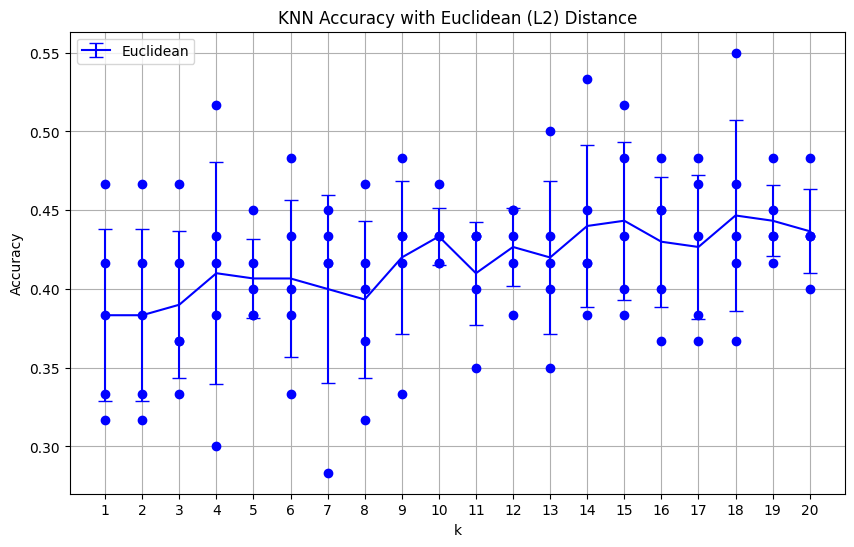

In [11]:
plot_single_accuracy(
    accuracies=euclidean_accuracies,
    k_values=k_values,
    title='KNN Accuracy with Euclidean (L2) Distance',
    color='b',
    label='Euclidean'
)